## Master Thesis - Plots (Decomposition and Filtering)

In [2]:
# Imports

import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk

from io import StringIO
from scipy.signal import find_peaks

import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.formula.api as smf


### 1. Load Data

This notebook relies on data that was previously created with the pipeline.ipynb

In [6]:
# Load from Pickle
eda_df_filtered = pd.read_pickle('eda_df_filtered_without_walking_files.pkl')

In [7]:
eda_df_filtered.head(5)

,Participant,leda_baseline.txt,leda_1a.txt,leda_1i.txt,leda_2a.txt,leda_2i.txt,leda_3a.txt,leda_3i.txt,leda_4a.txt,leda_4i.txt,leda_5a.txt,leda_5i.txt
0,pb26 - MMO02,"{'timestamps': [0.0, 0.0010001, 0.0020001, 0.0...","{'timestamps': [0.0, 0.00099998, 0.002, 0.0029...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.0020001, 0.00300...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ..."
1,pb30 - CAN61,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.0020001, 0.00300...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099998, 0.002, 0.003,..."
2,pb35 - BRE26,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099995, 0.0019999, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
3,pb37 - CCN18,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.0020001, 0.00300...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
4,pb27 - STG27,"{'timestamps': [0.0, 0.0010001, 0.0020002, 0.0...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.0010001, 0.0020001, 0.0...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."


#### 1.1 Sort dataframe according to participant's IDs ascendingly 

In [8]:
# Extract the number after 'pb' in the Participant column (e.g., 'pb39 - IKE31' -> 39)
eda_df_filtered['Participant_Number'] = eda_df_filtered['Participant'].str.extract(r'pb(\d+)').astype(int)

# Sort the DataFrame by the extracted number (ascending order)
eda_df_filtered_sorted = eda_df_filtered.sort_values(by='Participant_Number', ascending=True)

# Drop the helper column 'Participant_Number' after sorting
eda_df_filtered_sorted = eda_df_filtered_sorted.drop(columns='Participant_Number')

# Display the sorted DataFrame
eda_df_filtered_sorted.head(5)

,Participant,leda_baseline.txt,leda_1a.txt,leda_1i.txt,leda_2a.txt,leda_2i.txt,leda_3a.txt,leda_3i.txt,leda_4a.txt,leda_4i.txt,leda_5a.txt,leda_5i.txt
30,pb13 - AWD17,NaN,"{'timestamps': [0.48488, 0.48588, 0.48688, 0.4...","{'timestamps': [0.0, 0.0009999, 0.0019998, 0.0...","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.34701, 0.34801, 0.34901, 0.3...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.42984, 0.43084, 0.43184, 0.4...","{'timestamps': [0.21936, 0.22036, 0.22136, 0.2...","{'timestamps': [0.36814, 0.36914, 0.37014, 0.3...","{'timestamps': [0.241, 0.242, 0.243, 0.244, 0....","{'timestamps': [0.55182, 0.55282, 0.55382, 0.5..."
13,pb14 - MAN14,"{'timestamps': [0.0, 0.00099998, 0.002, 0.0029...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
12,pb15 - ONK28,"{'timestamps': [0.0, 0.0010001, 0.0020001, 0.0...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.00099993, 0.0019999, 0....","{'timestamps': [0.0, 0.00099998, 0.002, 0.0029...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099982, 0.0019996, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099998, 0.002, 0.0029...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
16,pb16 - KKN25,"{'timestamps': [0.0, 0.0010001, 0.0020001, 0.0...","{'timestamps': [0.0, 0.00099953, 0.0019991, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099998, 0.0019999, 0....","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.0020001, 0.00300...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
31,pb17 - AEW02,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."


#### 1.3 Check for NaN values

In [9]:
# Show rows where any column has NaN values
nan_rows = eda_df_filtered_sorted[eda_df_filtered_sorted.isna().any(axis=1)]

# Display the rows with NaN values
nan_rows

,Participant,leda_baseline.txt,leda_1a.txt,leda_1i.txt,leda_2a.txt,leda_2i.txt,leda_3a.txt,leda_3i.txt,leda_4a.txt,leda_4i.txt,leda_5a.txt,leda_5i.txt
30,pb13 - AWD17,NaN,"{'timestamps': [0.48488, 0.48588, 0.48688, 0.4...","{'timestamps': [0.0, 0.0009999, 0.0019998, 0.0...","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.34701, 0.34801, 0.34901, 0.3...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.42984, 0.43084, 0.43184, 0.4...","{'timestamps': [0.21936, 0.22036, 0.22136, 0.2...","{'timestamps': [0.36814, 0.36914, 0.37014, 0.3...","{'timestamps': [0.241, 0.242, 0.243, 0.244, 0....","{'timestamps': [0.55182, 0.55282, 0.55382, 0.5..."


#### 1.4 Remove rows with NaN values

As we can see only one participant contains a NaN value, so this participant needs to be excluded from the dataframe before further processing. 

In [10]:
# Drop rows that contain any NaN values
eda_df_filtered_cleaned = eda_df_filtered_sorted.dropna()

# Display the cleaned DataFrame
eda_df_filtered_cleaned.head(5)

,Participant,leda_baseline.txt,leda_1a.txt,leda_1i.txt,leda_2a.txt,leda_2i.txt,leda_3a.txt,leda_3i.txt,leda_4a.txt,leda_4i.txt,leda_5a.txt,leda_5i.txt
13,pb14 - MAN14,"{'timestamps': [0.0, 0.00099998, 0.002, 0.0029...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
12,pb15 - ONK28,"{'timestamps': [0.0, 0.0010001, 0.0020001, 0.0...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.00099993, 0.0019999, 0....","{'timestamps': [0.0, 0.00099998, 0.002, 0.0029...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099982, 0.0019996, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099998, 0.002, 0.0029...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
16,pb16 - KKN25,"{'timestamps': [0.0, 0.0010001, 0.0020001, 0.0...","{'timestamps': [0.0, 0.00099953, 0.0019991, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099998, 0.0019999, 0....","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099996, 0.0019999, 0....","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.0020001, 0.00300...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
31,pb17 - AEW02,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.0030001, ...","{'timestamps': [0.0, 0.00099999, 0.002, 0.003,...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
5,pb18 - WJG24,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.00099986, 0.0019997, 0....","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00...","{'timestamps': [0.0, 0.001, 0.0020001, 0.00300...","{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."


### 2. Transform Data

In [11]:
# Define the mapping for the new columns 'Typology' and 'Position'
file_mapping = {
    "leda_baseline.txt": ("Baseline", "Baseline"),
    "leda_1a.txt": ("CPS", "Peripheral"),
    "leda_1i.txt": ("CPS", "Central"),
    "leda_2a.txt": ("GS", "Peripheral"),
    "leda_2i.txt": ("GS", "Central"),
    "leda_3a.txt": ("BSS", "Peripheral"),
    "leda_3i.txt": ("BSS", "Central"),
    "leda_4a.txt": ("LPS", "Peripheral"),
    "leda_4i.txt": ("LPS", "Central"),
    "leda_5a.txt": ("TI", "Peripheral"),
    "leda_5i.txt": ("TI", "Central")
}

In [12]:
# Check the length of file_mapping
print(f"Total entries in file_mapping: {len(file_mapping)}")


Total entries in file_mapping: 11


In [13]:
# Initialize a list to store rows of the new DataFrame
eda_transformed_data = []

# Iterate through each row in the DataFrame
for index, row in eda_df_filtered_cleaned.iterrows():
    participant = row["Participant"]  # Get the participant ID

    # Process each file
    for file_name, (typology, position) in file_mapping.items():
        # Check if the file_name column exists
        if file_name in eda_df_filtered_cleaned.columns:
            # Safely access the EDA signal
            eda_signal = eda_df_filtered_cleaned.at[index, file_name]
            
            # Ensure there's data for this location and it's not empty
            if eda_signal is not None and len(eda_signal) > 0:
                # Append a new row to the data list
                eda_transformed_data.append({
                    "Participant": participant,
                    "Typology": typology,
                    "Position": position,
                    "EDA_signal": eda_signal
                })
        else:
            print(f"Column {file_name} not found in DataFrame.")
        
        
# Convert the list of dictionaries into a new DataFrame
eda_transformed_df = pd.DataFrame(eda_transformed_data)


In [14]:
eda_transformed_df

,Participant,Typology,Position,EDA_signal
0,pb14 - MAN14,Baseline,Baseline,"{'timestamps': [0.0, 0.00099998, 0.002, 0.0029..."
1,pb14 - MAN14,CPS,Peripheral,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
2,pb14 - MAN14,CPS,Central,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
3,pb14 - MAN14,GS,Peripheral,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
4,pb14 - MAN14,GS,Central,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
...,...,...,...,...
391,pb50 - MJN06,BSS,Central,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
392,pb50 - MJN06,LPS,Peripheral,"{'timestamps': [0.0, 0.00099999, 0.002, 0.003,..."
393,pb50 - MJN06,LPS,Central,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."
394,pb50 - MJN06,TI,Peripheral,"{'timestamps': [0.0, 0.001, 0.002, 0.003, 0.00..."


### 3. Extract EDA Signal

In [15]:
# Function to extract 'eda_values' from the EDA_signal dictionary
def extract_eda_values(eda_signal):
    if eda_signal and 'eda_values' in eda_signal:
        return eda_signal['eda_values']
    return None  # Return None if 'eda_values' key doesn't exist

# Create a new DataFrame by copying the existing one
eda_values_df = eda_transformed_df.copy()

# Apply the extraction function to the 'EDA_signal' column
eda_values_df['EDA_signal'] = eda_values_df['EDA_signal'].apply(lambda x: extract_eda_values(x))

# Show the first few rows to verify the result
eda_values_df

,Participant,Typology,Position,EDA_signal
0,pb14 - MAN14,Baseline,Baseline,"[6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.9..."
1,pb14 - MAN14,CPS,Peripheral,"[10.5, 10.5, 10.47, 10.47, 10.47, 10.5, 10.47,..."
2,pb14 - MAN14,CPS,Central,"[12.99, 12.99, 12.99, 12.99, 12.99, 12.99, 12...."
3,pb14 - MAN14,GS,Peripheral,"[12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12...."
4,pb14 - MAN14,GS,Central,"[16.94, 16.94, 16.92, 16.94, 16.92, 16.94, 16...."
...,...,...,...,...
391,pb50 - MJN06,BSS,Central,"[16.7, 16.7, 16.7, 16.72, 16.7, 16.7, 16.7, 16..."
392,pb50 - MJN06,LPS,Peripheral,"[18.63, 18.63, 18.63, 18.63, 18.63, 18.63, 18...."
393,pb50 - MJN06,LPS,Central,"[17.82, 17.82, 17.82, 17.82, 17.82, 17.82, 17...."
394,pb50 - MJN06,TI,Peripheral,"[16.94, 16.94, 16.94, 16.94, 16.94, 16.94, 16...."


### 4. Downsampling

In [16]:
# Function to downsample and round a single EDA signal
def downsample_signal(signal):
    # Ensure the signal is a valid 1D NumPy array
    signal = np.array(signal)
    
    # Check if the signal is long enough to be downsampled
    if len(signal) > 1:
        # Print the original signal length
        print(f"Original signal length: {len(signal)}")
        
        # Downsample the signal using NeuroKit's signal_resample function
        downsampled_signal = nk.signal_resample(signal, sampling_rate=1000, desired_sampling_rate=20)
        
        # Print the length of the downsampled signal to verify it worked
        print(f"Downsampled signal length: {len(downsampled_signal)}")
        
        # Round the downsampled signal to 2 decimal places
        downsampled_signal_rounded = np.round(downsampled_signal, 2)
        
        return downsampled_signal_rounded
    else:
        print(f"Signal too short or invalid: {signal}")
        return np.nan  # Return NaN for invalid signals

# List to store the downsampled signals
downsampled_signals = []

# Iterate through each row in the DataFrame
for index, row in eda_values_df.iterrows():
    eda_signal = row['EDA_signal']  # Access the EDA signal for the current row
    
    # Check if the signal is a valid array and not empty
    if isinstance(eda_signal, (list, np.ndarray)) and len(eda_signal) > 0:
        # Downsample the signal and append the result
        eda_downsampled = downsample_signal(eda_signal)
        downsampled_signals.append(eda_downsampled)
    else:
        print(f"Invalid signal at index {index}: {eda_signal}")
        downsampled_signals.append(np.nan)  # Append NaN if the signal is not valid

# Add the rounded downsampled signals as a new column in the DataFrame
eda_values_df['EDA_downsampled'] = downsampled_signals

# Display the updated DataFrame
eda_values_df


Original signal length: 180010
Downsampled signal length: 3600
Original signal length: 180003
Downsampled signal length: 3600
Original signal length: 180005
Downsampled signal length: 3600
Original signal length: 180003
Downsampled signal length: 3600
Original signal length: 180004
Downsampled signal length: 3600
Original signal length: 180007
Downsampled signal length: 3600
Original signal length: 179840
Downsampled signal length: 3597
Original signal length: 180005
Downsampled signal length: 3600
Original signal length: 180002
Downsampled signal length: 3600
Original signal length: 180004
Downsampled signal length: 3600
Original signal length: 180003
Downsampled signal length: 3600
Original signal length: 179995
Downsampled signal length: 3600
Original signal length: 180006
Downsampled signal length: 3600
Original signal length: 180002
Downsampled signal length: 3600
Original signal length: 180018
Downsampled signal length: 3600
Original signal length: 180009
Downsampled signal lengt

,Participant,Typology,Position,EDA_signal,EDA_downsampled
0,pb14 - MAN14,Baseline,Baseline,"[6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.9...","[6.91, 6.91, 6.93, 6.93, 6.96, 6.98, 7.01, 7.0..."
1,pb14 - MAN14,CPS,Peripheral,"[10.5, 10.5, 10.47, 10.47, 10.47, 10.5, 10.47,...","[10.5, 10.47, 10.47, 10.45, 10.45, 10.45, 10.4..."
2,pb14 - MAN14,CPS,Central,"[12.99, 12.99, 12.99, 12.99, 12.99, 12.99, 12....","[12.99, 13.01, 13.01, 13.01, 13.04, 13.04, 13...."
3,pb14 - MAN14,GS,Peripheral,"[12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12....","[12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12...."
4,pb14 - MAN14,GS,Central,"[16.94, 16.94, 16.92, 16.94, 16.92, 16.94, 16....","[16.94, 16.92, 16.92, 16.92, 16.89, 16.89, 16...."
...,...,...,...,...,...
391,pb50 - MJN06,BSS,Central,"[16.7, 16.7, 16.7, 16.72, 16.7, 16.7, 16.7, 16...","[16.7, 16.72, 16.75, 16.75, 16.75, 16.75, 16.7..."
392,pb50 - MJN06,LPS,Peripheral,"[18.63, 18.63, 18.63, 18.63, 18.63, 18.63, 18....","[18.63, 18.63, 18.65, 18.68, 18.7, 18.7, 18.7,..."
393,pb50 - MJN06,LPS,Central,"[17.82, 17.82, 17.82, 17.82, 17.82, 17.82, 17....","[17.82, 17.8, 17.8, 17.77, 17.75, 17.72, 17.7,..."
394,pb50 - MJN06,TI,Peripheral,"[16.94, 16.94, 16.94, 16.94, 16.94, 16.94, 16....","[16.94, 16.94, 16.97, 16.97, 16.97, 16.97, 16...."


### 5. Plot downsampled Data

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette and custom order for typologies
custom_palette = sns.color_palette("husl", n_colors=len(eda_values_df['Typology'].unique()))
custom_order = ['GS', 'CPS', 'BSS', 'LPS', 'TI']
typology_colors = {typology: color for typology, color in zip(custom_order, custom_palette)}
typology_colors['Baseline'] = 'red'

# Configure the font and grid style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False})

# Define participants and create an output directory
participants = eda_values_df['Participant'].unique()
output_folder = 'participant_eda_downsampled_plots'
os.makedirs(output_folder, exist_ok=True)

# Sampling rate for downsampled data
sampling_rate = 20  # in Hz
time_interval = 1 / sampling_rate  # Time interval in seconds

# Iterate through each participant to plot EDA_downsampled data
for participant in participants:
    participant_data = eda_values_df[eda_values_df['Participant'] == participant]
    baseline_data = participant_data[participant_data['Position'] == 'Baseline']
    central_data = participant_data[participant_data['Position'] == 'Central']
    peripheral_data = participant_data[participant_data['Position'] == 'Peripheral']
    
    # Create a figure with two subplots for Central and Peripheral
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot Central position
    for typology in custom_order:
        typology_data = central_data[central_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_signal = typology_data['EDA_downsampled'].values[0]
            time_vector = np.arange(len(eda_signal)) * time_interval
            
            axes[0].plot(time_vector, eda_signal, label=typology, color=typology_colors[typology], linewidth=1.5)
    
    # Plot Baseline for Central, if available
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_downsampled'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval
        axes[0].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[0].set_title(f'Central - {participant}')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Microsiemens')
    axes[0].legend(title="Typology", loc="upper right")

    # Plot Peripheral position
    for typology in custom_order:
        typology_data = peripheral_data[peripheral_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_signal = typology_data['EDA_downsampled'].values[0]
            time_vector = np.arange(len(eda_signal)) * time_interval
            
            axes[1].plot(time_vector, eda_signal, label=typology, color=typology_colors[typology], linewidth=1.5)

    # Plot Baseline for Peripheral, if available
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_downsampled'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval
        axes[1].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[1].set_title(f'Peripheral - {participant}')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Microsiemens')
    axes[1].legend(title="Typology", loc="upper right")

    # Save and close the plot
    plt.tight_layout()
    plot_filename = f"{output_folder}/{participant}_eda_downsampled_plot.png"
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)
    plt.close(fig)

print(f"All plots have been saved to the folder: {output_folder}")


All plots have been saved to the folder: participant_eda_downsampled_plots


### 6. Pre-Processing (cvxEDA + BioSPPy)

In [21]:
import neurokit2 as nk

# Create a copy of the DataFrame
eda_decomposed_df = eda_values_df.copy()

sampling_rate = 20

# Function to clean the EDA signal and decompose it into phasic and tonic components
def clean_and_decompose_eda_signal(eda_signal):
    if eda_signal is not None and len(eda_signal) > 0:
        # Clean the EDA signal using the 'biosppy' method
        eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=sampling_rate, method='biosppy')

        print("Check Clean")
        # Decompose the cleaned signal into tonic and phasic components using the 'cvxeda' method
        eda_decomposed = nk.eda_phasic(eda_cleaned, sampling_rate=sampling_rate, method='cvxeda')
        
        # Extract the tonic and phasic components
        tonic = eda_decomposed["EDA_Tonic"].tolist()
        phasic = eda_decomposed["EDA_Phasic"].tolist()
        
        return eda_cleaned, tonic, phasic
    return None, None, None

# Apply the cleaning and decomposition function to each row
clean_tonic_phasic_components = eda_decomposed_df['EDA_downsampled'].apply(lambda x: clean_and_decompose_eda_signal(x))

# Split the results into clean, tonic, and phasic components
eda_decomposed_df['EDA_Clean'] = clean_tonic_phasic_components.apply(lambda x: x[0])  # Cleaned signal
eda_decomposed_df['EDA_Tonic'] = clean_tonic_phasic_components.apply(lambda x: x[1])  # Tonic component
eda_decomposed_df['EDA_Phasic'] = clean_tonic_phasic_components.apply(lambda x: x[2])  # Phasic component

# Display the updated DataFrame
eda_decomposed_df


Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Chec

,Participant,Typology,Position,EDA_signal,EDA_downsampled,EDA_Clean,EDA_Tonic,EDA_Phasic
0,pb14 - MAN14,Baseline,Baseline,"[6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.9...","[6.91, 6.91, 6.93, 6.93, 6.96, 6.98, 7.01, 7.0...","[6.942727306657284, 6.9481153564665625, 6.9555...","[6.910251686087993, 6.913581108260152, 6.91691...","[0.0, 0.0, 0.012289562466185108, 0.03175910695..."
1,pb14 - MAN14,CPS,Peripheral,"[10.5, 10.5, 10.47, 10.47, 10.47, 10.5, 10.47,...","[10.5, 10.47, 10.47, 10.45, 10.45, 10.45, 10.4...","[10.471718316448104, 10.468895858328672, 10.46...","[10.401787557206694, 10.40473506409515, 10.407...","[0.0, 0.0, 0.10530498458678046, 0.082043556179..."
2,pb14 - MAN14,CPS,Central,"[12.99, 12.99, 12.99, 12.99, 12.99, 12.99, 12....","[12.99, 13.01, 13.01, 13.01, 13.04, 13.04, 13....","[13.010079271932252, 13.01190041645853, 13.014...","[12.953124955775241, 12.953708176378811, 12.95...","[0.0, 0.0, 0.1490512462440779, 0.1302198617578..."
3,pb14 - MAN14,GS,Peripheral,"[12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12....","[12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12....","[12.305868718284792, 12.30952846007988, 12.315...","[12.228711211182407, 12.229097469895903, 12.22...","[0.0, 0.0, 0.044380802589346846, 0.07560966008..."
4,pb14 - MAN14,GS,Central,"[16.94, 16.94, 16.92, 16.94, 16.92, 16.94, 16....","[16.94, 16.92, 16.92, 16.92, 16.89, 16.89, 16....","[16.920356028977555, 16.91841956052293, 16.915...","[16.871889051848353, 16.867898008715457, 16.86...","[0.0, 0.0, 0.04073045704988815, 0.043792681064..."
...,...,...,...,...,...,...,...,...
391,pb50 - MJN06,BSS,Central,"[16.7, 16.7, 16.7, 16.72, 16.7, 16.7, 16.7, 16...","[16.7, 16.72, 16.75, 16.75, 16.75, 16.75, 16.7...","[16.723762063286628, 16.725428095477383, 16.72...","[16.741268566693105, 16.74210049435897, 16.742...","[0.0, 0.0, -0.01966503503830791, -0.0158562477..."
392,pb50 - MJN06,LPS,Peripheral,"[18.63, 18.63, 18.63, 18.63, 18.63, 18.63, 18....","[18.63, 18.63, 18.65, 18.68, 18.7, 18.7, 18.7,...","[18.65619143728909, 18.65807922638178, 18.6605...","[18.625918347503536, 18.624980279574267, 18.62...","[0.0, 0.0, 0.02039807400588156, 0.032058224051..."
393,pb50 - MJN06,LPS,Central,"[17.82, 17.82, 17.82, 17.82, 17.82, 17.82, 17....","[17.82, 17.8, 17.8, 17.77, 17.75, 17.72, 17.7,...","[17.777210594350905, 17.771100975203858, 17.76...","[17.62816075021488, 17.622731419208268, 17.617...","[0.0, 0.0, 0.24175625736629164, 0.209100087688..."
394,pb50 - MJN06,TI,Peripheral,"[16.94, 16.94, 16.94, 16.94, 16.94, 16.94, 16....","[16.94, 16.94, 16.97, 16.97, 16.97, 16.97, 16....","[16.95591244215938, 16.95780860218524, 16.9604...","[16.95466908954091, 16.95394163996092, 16.9531...","[0.0, 0.0, -0.015529427791151618, -0.000812517..."


In [22]:
# Save as Pickle
eda_decomposed_df.to_pickle('eda_cvxeda_processed_20hz.pkl')

In [23]:
# Load from Pickle
eda_decomposed_df = pd.read_pickle('eda_cvxeda_processed_20hz.pkl')

In [27]:
# Check the length of lists or indicate non-list types for the first row in each column
lengths = {}
for column in eda_decomposed_df.columns:
    if isinstance(eda_decomposed_df[column].iloc[0], list):
        lengths[column] = len(eda_decomposed_df[column].iloc[0])
    else:
        lengths[column] = 'Not a list'

# Display the result
print(lengths)



{'Participant': 'Not a list', 'Typology': 'Not a list', 'Position': 'Not a list', 'EDA_signal': 180010, 'EDA_downsampled': 'Not a list', 'EDA_Clean': 'Not a list', 'EDA_Tonic': 3600, 'EDA_Phasic': 3600}


### 7. Plot undecomposed signal (BioSPPy Method)

In [28]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for the typologies
custom_palette = sns.color_palette("husl", n_colors=len(eda_decomposed_df['Typology'].unique()))

# Define the custom order for the typologies
custom_order = ['GS', 'CPS', 'BSS', 'LPS', 'TI']

# Define typology to color mapping, with Baseline set to red dashed line
typology_colors = {typology: color for typology, color in zip(custom_order, custom_palette)}
typology_colors['Baseline'] = 'red'  # Red color for Baseline

# Set Arial or a similar font
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # Adjust general font size
plt.rcParams['axes.titlesize'] = 14  # Adjust font size for titles
plt.rcParams['axes.labelsize'] = 14  # Adjust font size for axes labels

# Remove top and right spines for a cleaner look and add a grid
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False})

# Sampling rate for downsampled data
sampling_rate = 20  # Hz
time_interval = 1 / sampling_rate  # Time interval in seconds

# Number of participants
participants = eda_decomposed_df['Participant'].unique()

# Create a directory to store individual plots for EDA_Clean
output_folder = 'participant_eda_cvxeda_clean_20hz_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each participant and create a plot with two subplots (one for Central, one for Peripheral)
for participant in participants:
    # Filter the data for the current participant
    participant_data = eda_decomposed_df[eda_decomposed_df['Participant'] == participant]
    
    # Separate the Baseline data
    baseline_data = participant_data[participant_data['Position'] == 'Baseline']
    
    # Split the rest of the data by position for this participant
    central_data = participant_data[participant_data['Position'] == 'Central']
    peripheral_data = participant_data[participant_data['Position'] == 'Peripheral']
    
    # Create a figure for the participant with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot the EDA_Clean signals for Central position
    for typology in custom_order:
        typology_data = central_data[central_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_clean_signal = typology_data['EDA_Clean'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_clean_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[0].plot(time_vector, eda_clean_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)
    
    # Plot the Baseline on the Central plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Clean'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[0].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[0].set_title(f'Central - {participant}')
    axes[0].set_xlabel('Time (s)')  # Change the x-axis label to seconds
    axes[0].set_ylabel('Microsiemens')
    axes[0].legend(title="Typology", loc="upper right")

    # Plot the EDA_Clean signals for Peripheral position
    for typology in custom_order:
        typology_data = peripheral_data[peripheral_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_clean_signal = typology_data['EDA_Clean'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_clean_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[1].plot(time_vector, eda_clean_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)

    # Plot the Baseline on the Peripheral plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Clean'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[1].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[1].set_title(f'Peripheral - {participant}')
    axes[1].set_xlabel('Time (s)')  # Change the x-axis label to seconds
    axes[1].set_ylabel('Microsiemens')
    axes[1].legend(title="Typology", loc="upper right")

    # Adjust layout
    plt.tight_layout()

    # Save the plot for the current participant
    plot_filename = f"{output_folder}/{participant}_eda_cvxeda_clean_20hz_plot.png"
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)

    # Close the figure after saving to free up memory
    plt.close(fig)

print(f"All plots have been saved to the folder: {output_folder}")


All plots have been saved to the folder: participant_eda_cvxeda_clean_20hz_plots


### 8. Plot NeuroKit vs BioSPPy filtered signal against one another

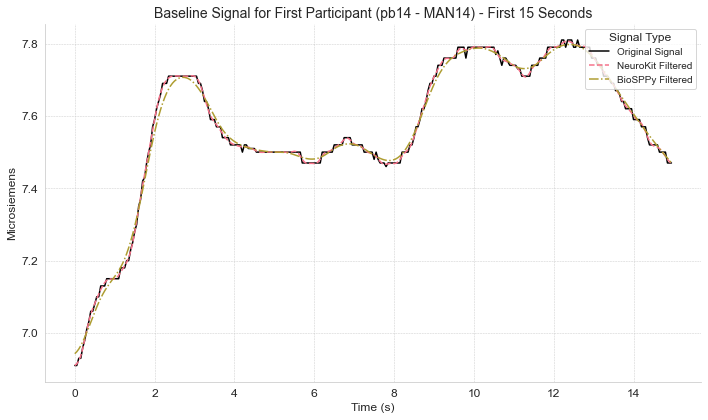

Plot saved successfully to: eda_filtered_plots/pb14 - MAN14_comparison_neurokit_biosppy_baseline_plot.png


In [30]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Define the custom color palette
custom_palette = sns.color_palette("husl", n_colors=5)
typology_colors = {
    'Original': 'black',  # For the original (noisy) signal
    'NeuroKit': custom_palette[0],  # First color in the palette
    'Biosppy': custom_palette[1],  # Second color in the palette
}

# Define output folder and ensure it exists
output_folder = 'eda_filtered_plots'
os.makedirs(output_folder, exist_ok=True)

# Filter data for the first participant and select only the baseline signal
first_participant = eda_values_df['Participant'].unique()[0]
participant_data = eda_values_df[(eda_values_df['Participant'] == first_participant) & 
                                 (eda_values_df['Position'] == 'Baseline')]

# Extract the downsampled signal
downsampled_signal = participant_data['EDA_downsampled'].values[0]

# Apply filtering to the downsampled signal using NeuroKit
sampling_rate = 20  # Adjust this as necessary
eda_filtered_neurokit = nk.eda_clean(downsampled_signal, sampling_rate=sampling_rate)
eda_filtered_biosppy = nk.eda_clean(downsampled_signal, sampling_rate=sampling_rate, method="biosppy")

# Limit to the first 15 seconds (20 samples per second * 15 seconds = 300 samples)
time_limit = 15 * sampling_rate
downsampled_signal = downsampled_signal[:time_limit]
eda_filtered_neurokit = eda_filtered_neurokit[:time_limit]
eda_filtered_biosppy = eda_filtered_biosppy[:time_limit]

# Create time vector in seconds for the first 15 seconds
time_vector = np.arange(time_limit) / sampling_rate

# Plot the baseline signal with and without filtering for the first 15 seconds
plt.figure(figsize=(10, 6))
plt.plot(time_vector, downsampled_signal, label='Original Signal', color=typology_colors['Original'], linewidth=1.5)
plt.plot(time_vector, eda_filtered_neurokit, label='NeuroKit Filtered', color=typology_colors['NeuroKit'], linestyle='--', linewidth=1.5)
plt.plot(time_vector, eda_filtered_biosppy, label='BioSPPy Filtered', color=typology_colors['Biosppy'], linestyle='-.', linewidth=1.5)

# Customize the plot
plt.title(f'Baseline Signal for First Participant ({first_participant}) - First 15 Seconds', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Microsiemens', fontsize=12)
plt.legend(title="Signal Type", fontsize=10, title_fontsize=12, loc="upper right")
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot
plot_filename = f"{output_folder}/{first_participant}_comparison_neurokit_biosppy_baseline_plot.png"
plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)  # Save with high resolution (300 dpi)

# Show the plot
plt.show()

print(f"Plot saved successfully to: {plot_filename}")



### 9. Plot phasic component: BioSPPy and cvxEDA

In [31]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for the typologies
custom_palette = sns.color_palette("husl", n_colors=len(eda_decomposed_df['Typology'].unique()))

# Define the custom order for the typologies
custom_order = ['GS', 'CPS', 'BSS', 'LPS', 'TI']

# Define typology to color mapping, with Baseline set to red dashed line
typology_colors = {typology: color for typology, color in zip(custom_order, custom_palette)}
typology_colors['Baseline'] = 'red'  # Red color for Baseline

# Set Arial or a similar font
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # Adjust general font size
plt.rcParams['axes.titlesize'] = 14  # Adjust font size for titles
plt.rcParams['axes.labelsize'] = 14  # Adjust font size for axes labels

# Remove top and right spines for a cleaner look and add a grid
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False})

# Sampling rate for downsampled data
sampling_rate = 20  # Hz
time_interval = 1 / sampling_rate  # Time interval in seconds

# Number of participants
participants = eda_decomposed_df['Participant'].unique()

# Create a directory to store individual plots for EDA_Phasic
output_folder = 'participant_eda_cvxeda_phasic_20hz_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each participant and create a plot with two subplots (one for Central, one for Peripheral)
for participant in participants:
    # Filter the data for the current participant
    participant_data = eda_decomposed_df[eda_decomposed_df['Participant'] == participant]
    
    # Separate the Baseline data
    baseline_data = participant_data[participant_data['Position'] == 'Baseline']
    
    # Split the rest of the data by position for this participant
    central_data = participant_data[participant_data['Position'] == 'Central']
    peripheral_data = participant_data[participant_data['Position'] == 'Peripheral']
    
    # Create a figure for the participant with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot the EDA_Phasic signals for Central position
    for typology in custom_order:
        typology_data = central_data[central_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_phasic_signal = typology_data['EDA_Phasic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_phasic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[0].plot(time_vector, eda_phasic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)
    
    # Plot the Baseline on the Central plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Phasic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[0].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[0].set_title(f'Central - {participant}')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Microsiemens')
    axes[0].legend(title="Typology", loc="upper right")

    # Plot the EDA_Phasic signals for Peripheral position
    for typology in custom_order:
        typology_data = peripheral_data[peripheral_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_phasic_signal = typology_data['EDA_Phasic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_phasic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[1].plot(time_vector, eda_phasic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)

    # Plot the Baseline on the Peripheral plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Phasic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[1].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[1].set_title(f'Peripheral - {participant}')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Microsiemens')
    axes[1].legend(title="Typology", loc="upper right")

    # Adjust layout
    plt.tight_layout()

    # Save the plot for the current participant
    plot_filename = f"{output_folder}/{participant}_eda_cvxeda_phasic_20hz_plot.png"
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)  # Save with high resolution (300 dpi)

    # Close the figure after saving to free up memory
    plt.close(fig)

print(f"All plots have been saved to the folder: {output_folder}")


All plots have been saved to the folder: participant_eda_cvxeda_phasic_20hz_plots


### 10. Plot tonic component: BioSPPy and cvxEDA

In [32]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for the typologies
custom_palette = sns.color_palette("husl", n_colors=len(eda_decomposed_df['Typology'].unique()))

# Define the custom order for the typologies
custom_order = ['GS', 'CPS', 'BSS', 'LPS', 'TI']

# Define typology to color mapping, with Baseline set to red dashed line
typology_colors = {typology: color for typology, color in zip(custom_order, custom_palette)}
typology_colors['Baseline'] = 'red'  # Red color for Baseline

# Set Arial or a similar font
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # Adjust general font size
plt.rcParams['axes.titlesize'] = 14  # Adjust font size for titles
plt.rcParams['axes.labelsize'] = 14  # Adjust font size for axes labels

# Remove top and right spines for a cleaner look and add a grid
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False})

# Sampling rate for downsampled data
sampling_rate = 20  # Hz
time_interval = 1 / sampling_rate  # Time interval in seconds

# Number of participants
participants = eda_decomposed_df['Participant'].unique()

# Create a directory to store individual plots for EDA_Tonic
output_folder = 'participant_eda_cvxeda_tonic_20hz_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each participant and create a plot with two subplots (one for Central, one for Peripheral)
for participant in participants:
    # Filter the data for the current participant
    participant_data = eda_decomposed_df[eda_decomposed_df['Participant'] == participant]
    
    # Separate the Baseline data
    baseline_data = participant_data[participant_data['Position'] == 'Baseline']
    
    # Split the rest of the data by position for this participant
    central_data = participant_data[participant_data['Position'] == 'Central']
    peripheral_data = participant_data[participant_data['Position'] == 'Peripheral']
    
    # Create a figure for the participant with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot the EDA_Tonic signals for Central position
    for typology in custom_order:
        typology_data = central_data[central_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_tonic_signal = typology_data['EDA_Tonic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_tonic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[0].plot(time_vector, eda_tonic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)
    
    # Plot the Baseline on the Central plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Tonic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[0].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[0].set_title(f'Central - {participant}')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Microsiemens')
    axes[0].legend(title="Typology", loc="upper right")

    # Plot the EDA_Tonic signals for Peripheral position
    for typology in custom_order:
        typology_data = peripheral_data[peripheral_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_tonic_signal = typology_data['EDA_Tonic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_tonic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[1].plot(time_vector, eda_tonic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)

    # Plot the Baseline on the Peripheral plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Tonic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[1].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=2)
    
    axes[1].set_title(f'Peripheral - {participant}')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Microsiemens')
    axes[1].legend(title="Typology", loc="upper right")

    # Adjust layout
    plt.tight_layout()

    # Save the plot for the current participant
    plot_filename = f"{output_folder}/{participant}_eda_cvxeda_tonic_20hz_plot.png"
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)  # Save with high resolution (300 dpi)

    # Close the figure after saving to free up memory
    plt.close(fig)

print(f"All plots have been saved to the folder: {output_folder}")


All plots have been saved to the folder: participant_eda_cvxeda_tonic_20hz_plots


### 11. Apply High-Pass Filter for Decomposition

In [38]:
import neurokit2 as nk

# Create a copy of the DataFrame
eda_decomposed_highpass_df = eda_values_df.copy()

# Function to clean the EDA signal and decompose it into phasic and tonic components
def clean_and_decompose_eda_signal(eda_signal):
    if eda_signal is not None and len(eda_signal) > 0:
        # Clean the EDA signal using the 'biosppy' method
        eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=20, method='biosppy')

        print("Check Clean")
        # Decompose the cleaned signal into tonic and phasic components using the 'cvxeda' method
        eda_decomposed = nk.eda_phasic(eda_cleaned, sampling_rate=20, method='highpass')
        
        # Extract the tonic and phasic components
        tonic = eda_decomposed["EDA_Tonic"].tolist()
        phasic = eda_decomposed["EDA_Phasic"].tolist()
        
        return eda_cleaned, tonic, phasic
    return None, None, None

# Apply the cleaning and decomposition function to each row
clean_tonic_phasic_components = eda_decomposed_highpass_df['EDA_downsampled'].apply(lambda x: clean_and_decompose_eda_signal(x))

# Split the results into clean, tonic, and phasic components
eda_decomposed_highpass_df['EDA_Clean'] = clean_tonic_phasic_components.apply(lambda x: x[0])  # Cleaned signal
eda_decomposed_highpass_df['EDA_Tonic'] = clean_tonic_phasic_components.apply(lambda x: x[1])  # Tonic component
eda_decomposed_highpass_df['EDA_Phasic'] = clean_tonic_phasic_components.apply(lambda x: x[2])  # Phasic component

# Display the updated DataFrame
eda_decomposed_highpass_df


Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Check Clean
Chec

,Participant,Typology,Position,EDA_signal,EDA_downsampled,EDA_Clean,EDA_Tonic,EDA_Phasic
0,pb14 - MAN14,Baseline,Baseline,"[6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.91, 6.9...","[6.91, 6.91, 6.93, 6.93, 6.96, 6.98, 7.01, 7.0...","[6.942727306657284, 6.9481153564665625, 6.9555...","[7.131554686746494, 7.135497823560755, 7.13945...","[-0.18882738008964278, -0.1873824670945961, -0..."
1,pb14 - MAN14,CPS,Peripheral,"[10.5, 10.5, 10.47, 10.47, 10.47, 10.5, 10.47,...","[10.5, 10.47, 10.47, 10.45, 10.45, 10.45, 10.4...","[10.471718316448104, 10.468895858328672, 10.46...","[10.436020064335352, 10.434449002922825, 10.43...","[0.035698252111253465, 0.03444685540436753, 0...."
2,pb14 - MAN14,CPS,Central,"[12.99, 12.99, 12.99, 12.99, 12.99, 12.99, 12....","[12.99, 13.01, 13.01, 13.01, 13.04, 13.04, 13....","[13.010079271932252, 13.01190041645853, 13.014...","[13.172143253430518, 13.175771051044851, 13.17...","[-0.16206398149852894, -0.16387063458656145, -..."
3,pb14 - MAN14,GS,Peripheral,"[12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12....","[12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12.3, 12....","[12.305868718284792, 12.30952846007988, 12.315...","[12.378005555187618, 12.379125769793262, 12.38...","[-0.07213683690340496, -0.0695973097139586, -0..."
4,pb14 - MAN14,GS,Central,"[16.94, 16.94, 16.92, 16.94, 16.92, 16.94, 16....","[16.94, 16.92, 16.92, 16.92, 16.89, 16.89, 16....","[16.920356028977555, 16.91841956052293, 16.915...","[16.928853980212825, 16.92818367082383, 16.927...","[-0.008497951237840876, -0.009764110303438652,..."
...,...,...,...,...,...,...,...,...
391,pb50 - MJN06,BSS,Central,"[16.7, 16.7, 16.7, 16.72, 16.7, 16.7, 16.7, 16...","[16.7, 16.72, 16.75, 16.75, 16.75, 16.75, 16.7...","[16.723762063286628, 16.725428095477383, 16.72...","[16.76434095294361, 16.76470659746979, 16.7650...","[-0.04057888965732322, -0.03927850199273447, -..."
392,pb50 - MJN06,LPS,Peripheral,"[18.63, 18.63, 18.63, 18.63, 18.63, 18.63, 18....","[18.63, 18.63, 18.65, 18.68, 18.7, 18.7, 18.7,...","[18.65619143728909, 18.65807922638178, 18.6605...","[18.541362682309092, 18.537306415189263, 18.53...","[0.11482875497859318, 0.12077281119113004, 0.1..."
393,pb50 - MJN06,LPS,Central,"[17.82, 17.82, 17.82, 17.82, 17.82, 17.82, 17....","[17.82, 17.8, 17.8, 17.77, 17.75, 17.72, 17.7,...","[17.777210594350905, 17.771100975203858, 17.76...","[17.531622329835997, 17.527549864648584, 17.52...","[0.24558826451467192, 0.24355111055502454, 0.2..."
394,pb50 - MJN06,TI,Peripheral,"[16.94, 16.94, 16.94, 16.94, 16.94, 16.94, 16....","[16.94, 16.94, 16.97, 16.97, 16.97, 16.97, 16....","[16.95591244215938, 16.95780860218524, 16.9604...","[16.961254350867055, 16.96093778521898, 16.960...","[-0.005341908710216413, -0.0031291830363133627..."


In [39]:
# Access the first row of the DataFrame
first_row = eda_decomposed_highpass_df.iloc[0]

# Calculate lengths
clean_length = len(first_row["EDA_Clean"]) if first_row["EDA_Clean"] is not None else None
tonic_length = len(first_row["EDA_Tonic"]) if first_row["EDA_Tonic"] is not None else None
phasic_length = len(first_row["EDA_Phasic"]) if first_row["EDA_Phasic"] is not None else None

# Print the lengths
print({
    "Cleaned Length": clean_length,
    "Tonic Length": tonic_length,
    "Phasic Length": phasic_length
})


{'Cleaned Length': 3600, 'Tonic Length': 3600, 'Phasic Length': 3600}


### 12. Phasic Component Plots: High-Pass Filter

In [40]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for the typologies
custom_palette = sns.color_palette("husl", n_colors=len(eda_decomposed_highpass_df['Typology'].unique()))

# Define the custom order for the typologies
custom_order = ['GS', 'CPS', 'BSS', 'LPS', 'TI']

# Define typology to color mapping, with Baseline set to red dashed line
typology_colors = {typology: color for typology, color in zip(custom_order, custom_palette)}
typology_colors['Baseline'] = 'red'  # Red color for Baseline

# Set Arial or a similar font
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # Adjust general font size
plt.rcParams['axes.titlesize'] = 14  # Adjust font size for titles
plt.rcParams['axes.labelsize'] = 14  # Adjust font size for axes labels

# Remove top and right spines for a cleaner look and add a grid
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False})

# Sampling rate for downsampled data
sampling_rate = 20  # Hz
time_interval = 1 / sampling_rate  # Time interval in seconds

# Number of participants
participants = eda_decomposed_highpass_df['Participant'].unique()

# Create a directory to store individual plots for EDA_Phasic (Highpass filtered data)
output_folder = 'participant_eda_highpass_phasic_20hz_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each participant and create a plot with two subplots (one for Central, one for Peripheral)
for participant in participants:
    # Filter the data for the current participant
    participant_data = eda_decomposed_highpass_df[eda_decomposed_highpass_df['Participant'] == participant]
    
    # Separate the Baseline data
    baseline_data = participant_data[participant_data['Position'] == 'Baseline']
    
    # Split the rest of the data by position for this participant
    central_data = participant_data[participant_data['Position'] == 'Central']
    peripheral_data = participant_data[participant_data['Position'] == 'Peripheral']
    
    # Create a figure for the participant with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot the EDA_Phasic signals for Central position
    for typology in custom_order:
        typology_data = central_data[central_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_phasic_signal = typology_data['EDA_Phasic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_phasic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[0].plot(time_vector, eda_phasic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=0.7)
    
    # Plot the Baseline on the Central plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Phasic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[0].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=0.7)
    
    axes[0].set_title(f'Central - {participant}')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Microsiemens')
    axes[0].legend(title="Typology", loc="upper right")

    # Plot the EDA_Phasic signals for Peripheral position
    for typology in custom_order:
        typology_data = peripheral_data[peripheral_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_phasic_signal = typology_data['EDA_Phasic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_phasic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[1].plot(time_vector, eda_phasic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=0.7)

    # Plot the Baseline on the Peripheral plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Phasic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[1].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=0.7)
    
    axes[1].set_title(f'Peripheral - {participant}')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Microsiemens')
    axes[1].legend(title="Typology", loc="upper right")

    # Adjust layout
    plt.tight_layout()

    # Save the plot for the current participant with a highpass-specific filename
    plot_filename = f"{output_folder}/{participant}_eda_highpass_phasic_20hz_plot.png"
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)

    # Close the figure after saving to free up memory
    plt.close(fig)

print(f"All plots have been saved to the folder: {output_folder}")


All plots have been saved to the folder: participant_eda_highpass_phasic_20hz_plots


### 13. Tonic Component Plots: High-Pass Filter

In [41]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for the typologies
custom_palette = sns.color_palette("husl", n_colors=len(eda_decomposed_highpass_df['Typology'].unique()))

# Define the custom order for the typologies
custom_order = ['GS', 'CPS', 'BSS', 'LPS', 'TI']

# Define typology to color mapping, with Baseline set to red dashed line
typology_colors = {typology: color for typology, color in zip(custom_order, custom_palette)}
typology_colors['Baseline'] = 'red'  # Red color for Baseline

# Set Arial or a similar font
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # Adjust general font size
plt.rcParams['axes.titlesize'] = 14  # Adjust font size for titles
plt.rcParams['axes.labelsize'] = 14  # Adjust font size for axes labels

# Remove top and right spines for a cleaner look and add a grid
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False})

# Sampling rate for downsampled data
sampling_rate = 20  # Hz
time_interval = 1 / sampling_rate  # Time interval in seconds

# Number of participants
participants = eda_decomposed_highpass_df['Participant'].unique()

# Create a directory to store individual plots for EDA_Tonic (Highpass filtered data)
output_folder = 'participant_eda_highpass_tonic_20hz_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each participant and create a plot with two subplots (one for Central, one for Peripheral)
for participant in participants:
    # Filter the data for the current participant
    participant_data = eda_decomposed_highpass_df[eda_decomposed_highpass_df['Participant'] == participant]
    
    # Separate the Baseline data
    baseline_data = participant_data[participant_data['Position'] == 'Baseline']
    
    # Split the rest of the data by position for this participant
    central_data = participant_data[participant_data['Position'] == 'Central']
    peripheral_data = participant_data[participant_data['Position'] == 'Peripheral']
    
    # Create a figure for the participant with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot the EDA_Tonic signals for Central position
    for typology in custom_order:
        typology_data = central_data[central_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_tonic_signal = typology_data['EDA_Tonic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_tonic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[0].plot(time_vector, eda_tonic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)
    
    # Plot the Baseline on the Central plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Tonic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[0].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=1.5)
    
    axes[0].set_title(f'Central - {participant}')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Microsiemens')
    axes[0].legend(title="Typology", loc="upper right")

    # Plot the EDA_Tonic signals for Peripheral position
    for typology in custom_order:
        typology_data = peripheral_data[peripheral_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_tonic_signal = typology_data['EDA_Tonic'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_tonic_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[1].plot(time_vector, eda_tonic_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)

    # Plot the Baseline on the Peripheral plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Tonic'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[1].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=1.5)
    
    axes[1].set_title(f'Peripheral - {participant}')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Microsiemens')
    axes[1].legend(title="Typology", loc="upper right")

    # Adjust layout
    plt.tight_layout()

    # Save the plot for the current participant with a highpass-specific filename
    plot_filename = f"{output_folder}/{participant}_eda_highpass_tonic_20hz_plot.png"
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)

    # Close the figure after saving to free up memory
    plt.close(fig)

print(f"All plots have been saved to the folder: {output_folder}")


All plots have been saved to the folder: participant_eda_highpass_tonic_20hz_plots


### 14. Undecomposed Signal: High-Pass Filter

In [42]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette for the typologies
custom_palette = sns.color_palette("husl", n_colors=len(eda_decomposed_highpass_df['Typology'].unique()))

# Define the custom order for the typologies
custom_order = ['GS', 'CPS', 'BSS', 'LPS', 'TI']

# Define typology to color mapping, with Baseline set to red dashed line
typology_colors = {typology: color for typology, color in zip(custom_order, custom_palette)}
typology_colors['Baseline'] = 'red'  # Red color for Baseline

# Set Arial or a similar font
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12  # Adjust general font size
plt.rcParams['axes.titlesize'] = 14  # Adjust font size for titles
plt.rcParams['axes.labelsize'] = 14  # Adjust font size for axes labels

# Remove top and right spines for a cleaner look and add a grid
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False})

# Sampling rate for downsampled data
sampling_rate = 20  # Hz
time_interval = 1 / sampling_rate  # Time interval in seconds

# Number of participants
participants = eda_decomposed_highpass_df['Participant'].unique()

# Create a directory to store individual plots for EDA_Clean (Highpass filtered data)
output_folder = 'participant_eda_highpass_clean_20hz_plots'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through each participant and create a plot with two subplots (one for Central, one for Peripheral)
for participant in participants:
    # Filter the data for the current participant
    participant_data = eda_decomposed_highpass_df[eda_decomposed_highpass_df['Participant'] == participant]
    
    # Separate the Baseline data
    baseline_data = participant_data[participant_data['Position'] == 'Baseline']
    
    # Split the rest of the data by position for this participant
    central_data = participant_data[participant_data['Position'] == 'Central']
    peripheral_data = participant_data[participant_data['Position'] == 'Peripheral']
    
    # Create a figure for the participant with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot the EDA_Clean signals for Central position
    for typology in custom_order:
        typology_data = central_data[central_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_clean_signal = typology_data['EDA_Clean'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_clean_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[0].plot(time_vector, eda_clean_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)
    
    # Plot the Baseline on the Central plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Clean'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[0].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=1.5)
    
    axes[0].set_title(f'Central - {participant}')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Microsiemens')
    axes[0].legend(title="Typology", loc="upper right")

    # Plot the EDA_Clean signals for Peripheral position
    for typology in custom_order:
        typology_data = peripheral_data[peripheral_data['Typology'] == typology]
        
        if not typology_data.empty:
            eda_clean_signal = typology_data['EDA_Clean'].values[0]  # Assuming one signal per participant/typology
            time_vector = np.arange(len(eda_clean_signal)) * time_interval  # Adjusted for 20 Hz
            
            # Plot without markers (only lines)
            axes[1].plot(time_vector, eda_clean_signal, label=f"{typology}", color=typology_colors[typology], linewidth=1.5)

    # Plot the Baseline on the Peripheral plot, if it exists
    if not baseline_data.empty:
        baseline_signal = baseline_data['EDA_Clean'].values[0]
        time_vector = np.arange(len(baseline_signal)) * time_interval  # Adjusted for 20 Hz
        axes[1].plot(time_vector, baseline_signal, label="Baseline", linestyle='--', color='red', linewidth=1.5)
    
    axes[1].set_title(f'Peripheral - {participant}')
    axes[1].set_xlabel('Time (s)')
    axes[1].set_ylabel('Microsiemens')
    axes[1].legend(title="Typology", loc="upper right")

    # Adjust layout
    plt.tight_layout()

    # Save the plot for the current participant
    plot_filename = f"{output_folder}/{participant}_eda_highpass_clean_20hz_plot.png"
    plt.savefig(plot_filename, format='png', bbox_inches='tight', dpi=300)

    # Close the figure after saving to free up memory
    plt.close(fig)

print(f"All plots have been saved to the folder: {output_folder}")


All plots have been saved to the folder: participant_eda_highpass_clean_20hz_plots
